In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from ipywidgets import interact,interact_manual
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("/content/drive/MyDrive/datasets/newdata1/weatherAUS.csv",parse_dates=[0])

In [4]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


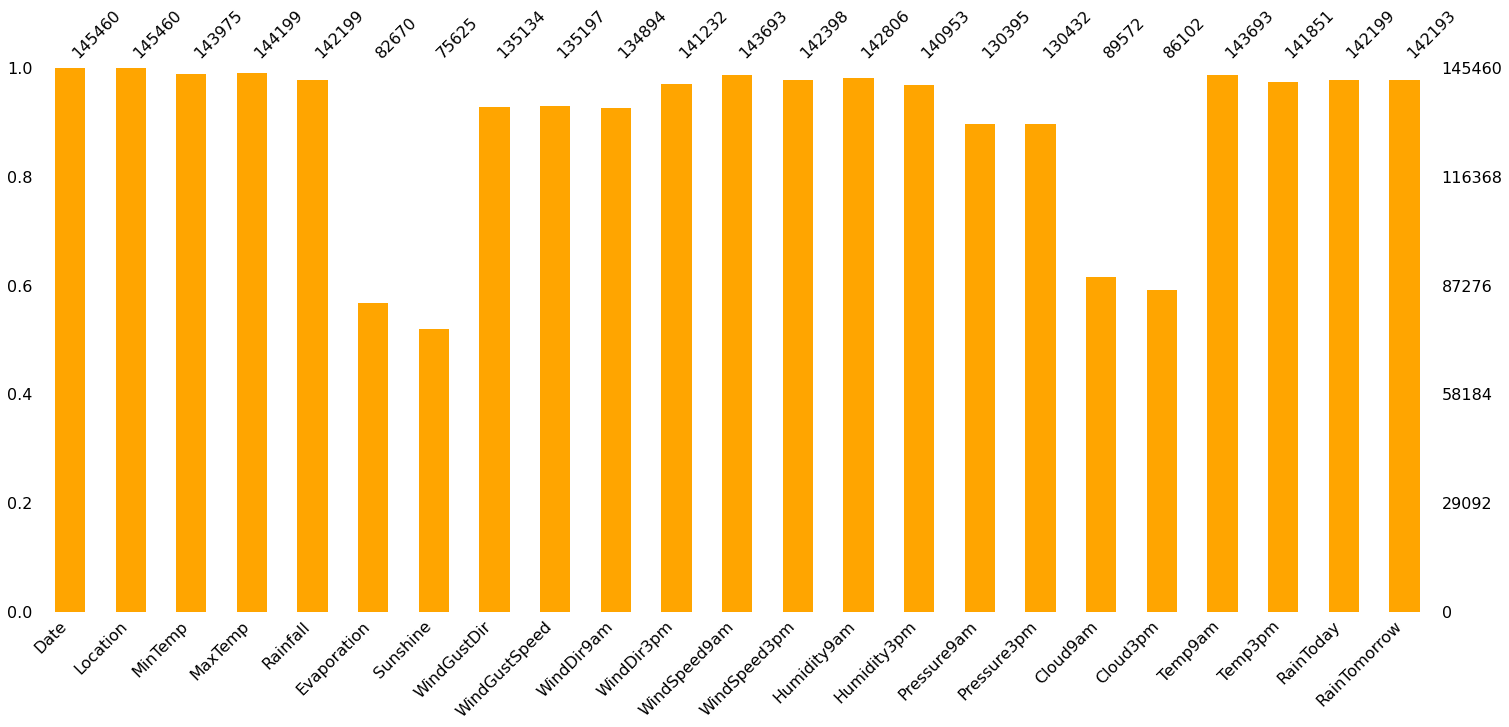

In [5]:
missingno.bar(data,color="orange")

In [6]:
pd.DataFrame({"Columns":[ i for i in data.columns],"Shape":[data.shape[0] for i in range(len(data.columns))],
              "Dtypes":[ data[i].dtypes for i in data.columns],"Missing":[ data[c].isnull().sum() for c in data.columns],
              "Missing_%":[ 100*(data[c].isnull().sum()/len(data.index)) for c in data.columns],
              "Unique":[ len(data[c].unique()) for c in data.columns]}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
Columns,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Shape,145460,145460,145460,145460,145460,145460,145460,145460,145460,145460,145460,145460,145460,145460,145460,145460,145460,145460,145460,145460,145460,145460,145460
Dtypes,datetime64[ns],object,float64,float64,float64,float64,float64,object,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object
Missing,0,0,1485,1261,3261,62790,69835,10326,10263,10566,4228,1767,3062,2654,4507,15065,15028,55888,59358,1767,3609,3261,3267
Missing_%,0,0,1.0209,0.866905,2.24185,43.1665,48.0098,7.09886,7.05555,7.26385,2.90664,1.21477,2.10505,1.82456,3.09845,10.3568,10.3314,38.4216,40.8071,1.21477,2.48109,2.24185,2.24598
Unique,3436,49,390,506,682,359,146,17,68,17,17,44,45,102,102,547,550,11,11,442,503,3,3


In [7]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


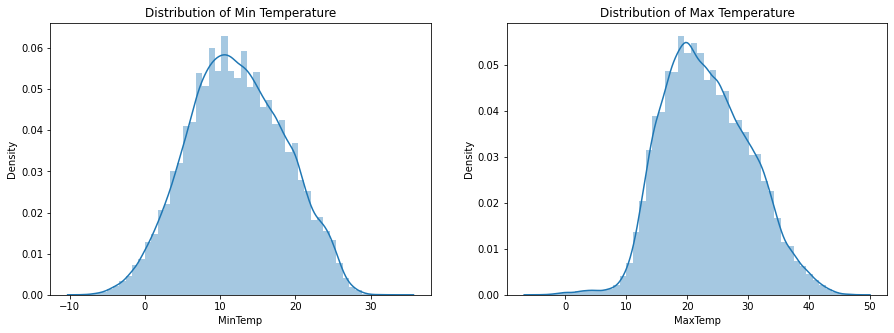

In [8]:
plt.rcParams["figure.figsize"]=(15,5)
plt.subplot(1,2,1)
plt.title("Distribution of Min Temperature")
sns.distplot(data["MinTemp"])
plt.subplot(1,2,2)
plt.title("Distribution of Max Temperature")
sns.distplot(data["MaxTemp"])
plt.show()

## From Here we Conclude that data is Normally Distributed So we Impute missing values by Mean

In [9]:
data["MinTemp"].isnull().sum(),data["MaxTemp"].isnull().sum()

(1485, 1261)

In [10]:
data["MaxTemp"]=data["MaxTemp"].fillna(data["MaxTemp"].mean())
data["MinTemp"]=data["MinTemp"].fillna(data["MinTemp"].mean())
# data[["MinTemp","MaxTemp"]]=data[["MinTemp","MaxTemp"]].apply(lambda f: f.apply(lambda x: f.mean() if x is np.NaN else x))

In [11]:
data["MinTemp"].isnull().sum(),data["MaxTemp"].isnull().sum()

(0, 0)

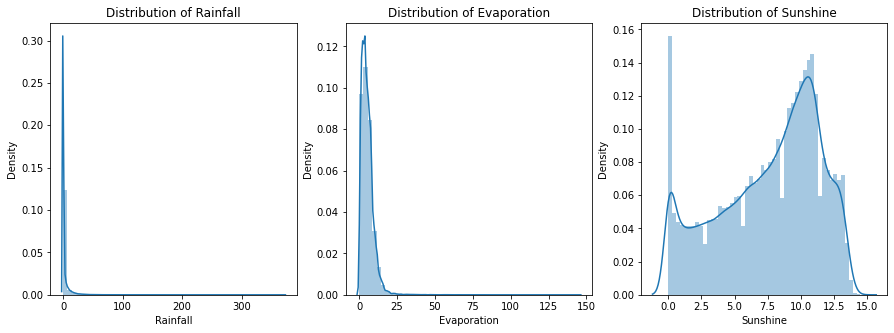

In [12]:
plt.rcParams["figure.figsize"]=(15,5)
plt.subplot(1,3,1)
plt.title("Distribution of Rainfall")
sns.distplot(data["Rainfall"])
plt.subplot(1,3,2)
plt.title("Distribution of Evaporation")
sns.distplot(data["Evaporation"])
plt.subplot(1,3,3)
plt.title("Distribution of Sunshine")
sns.distplot(data["Sunshine"])
plt.show()

In [13]:
data["Rainfall"].isnull().sum(),data["Evaporation"].isnull().sum(),data["Sunshine"].isnull().sum()

(3261, 62790, 69835)

In [14]:
data["Rainfall"]=data["Rainfall"].fillna(np.random.choice(data["Rainfall"].value_counts()[:1].keys()))

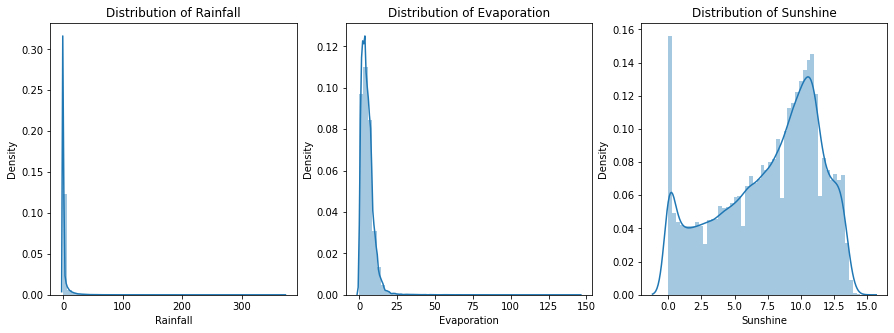

In [15]:
plt.rcParams["figure.figsize"]=(15,5)
plt.subplot(1,3,1)
plt.title("Distribution of Rainfall")
sns.distplot(data["Rainfall"])
plt.subplot(1,3,2)
plt.title("Distribution of Evaporation")
sns.distplot(data["Evaporation"])
plt.subplot(1,3,3)
plt.title("Distribution of Sunshine")
sns.distplot(data["Sunshine"])
plt.show()

Here we see clearly that data of rainfall is not much effected

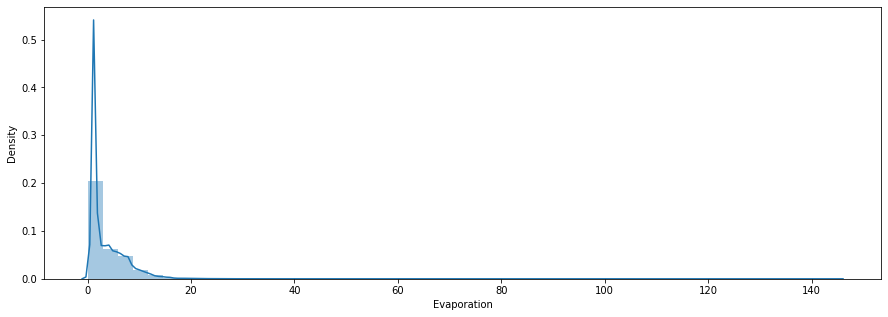

In [16]:
sns.distplot(data["Evaporation"].fillna(np.random.choice(data["Evaporation"].value_counts().keys()[:20])))

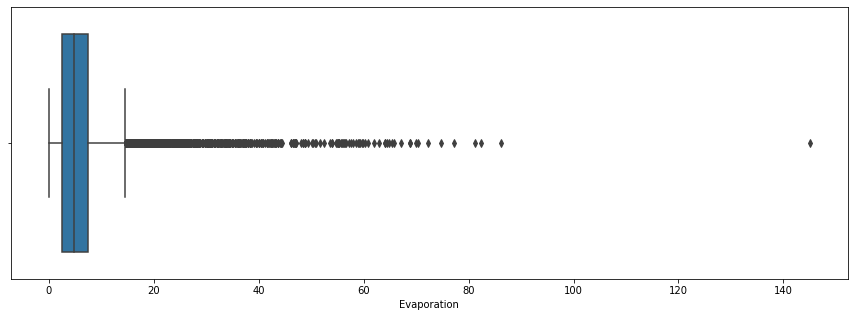

In [17]:
sns.boxplot(data["Evaporation"])

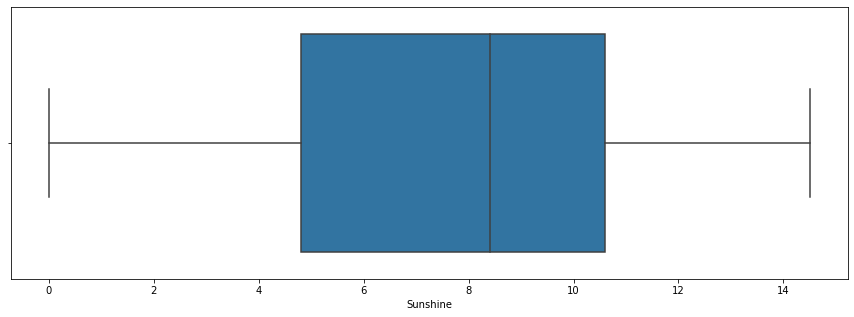

In [18]:
sns.boxplot(data["Sunshine"])

In [19]:
 data["Sunshine"].mean(), data["Sunshine"].max(), data["Sunshine"].min(), data["Sunshine"].median()

(7.611177520661145, 14.5, 0.0, 8.4)

In Sunshine case their is no Much Difference so we replace with mean etc

In [20]:
data["Sunshine"]=data["Sunshine"].fillna(np.random.choice([7.61, 14.5, 0.0,8.4]))

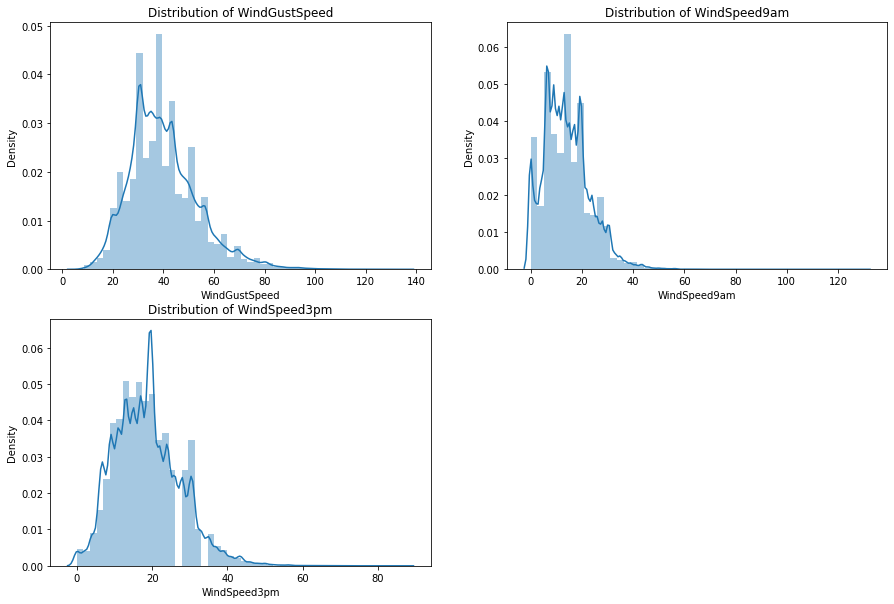

In [21]:
plt.rcParams["figure.figsize"]=(15,10)
 
plt.subplot(2,2,1)
plt.title("Distribution of WindGustSpeed")
sns.distplot(data["WindGustSpeed"])
plt.subplot(2,2,2)
plt.title("Distribution of WindSpeed9am")
sns.distplot(data["WindSpeed9am"])
plt.subplot(2,2,3)
plt.title("Distribution of WindSpeed3pm")
sns.distplot(data["WindSpeed3pm"])
plt.show()

In [22]:
data["WindGustSpeed"]=data["WindGustSpeed"].fillna(np.random.choice([data["WindGustSpeed"].median(),data["WindGustSpeed"].max(),data["WindGustSpeed"].min()]))

In [23]:
data["WindSpeed9am"].isnull().sum()

1767

In [24]:
data["WindSpeed9am"]=data["WindSpeed9am"].fillna(np.random.choice([data["WindSpeed9am"].median(),data["WindSpeed9am"].max(),data["WindSpeed9am"].min()]))

In [25]:
data["WindSpeed3pm"].isnull().sum()

3062

In [26]:
data["WindSpeed3pm"]=data["WindSpeed3pm"].fillna(np.random.choice([data["WindSpeed3pm"].median(),data["WindSpeed3pm"].max(),data["WindSpeed3pm"].min()]))

In [28]:
data["WindDir3pm"].isnull().sum()

4228

In [29]:
data["WindDir3pm"].mode()

0    SE
dtype: object

In [30]:
data["WindDir3pm"].value_counts()

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

In [31]:
data["WindDir3pm"]=data["WindDir3pm"].fillna(np.random.choice(["SE","W","S"]))

In [32]:
data["WindDir9am"]=data["WindDir9am"].fillna(np.random.choice(["N","SE","E"]))

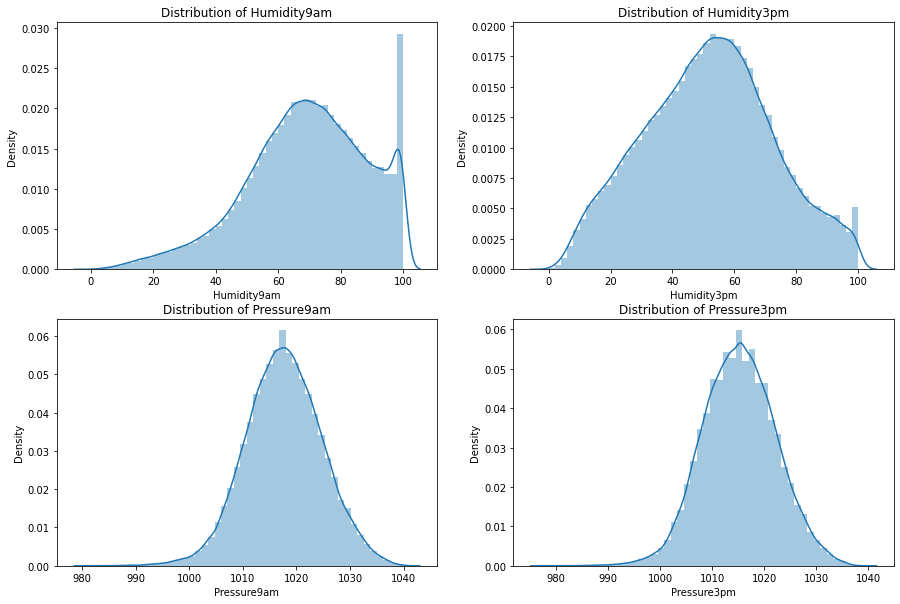

In [33]:
plt.rcParams["figure.figsize"]=(15,10)
 
plt.subplot(2,2,1)
plt.title("Distribution of Humidity9am")
sns.distplot(data["Humidity9am"])
plt.subplot(2,2,2)
plt.title("Distribution of Humidity3pm")
sns.distplot(data["Humidity3pm"])
plt.subplot(2,2,3)
plt.title("Distribution of Pressure9am")
sns.distplot(data["Pressure9am"])
plt.subplot(2,2,4)
plt.title("Distribution of Pressure3pm")
sns.distplot(data["Pressure3pm"])
plt.show()

## Here we can see that Pressure is normally distributed so we can replace by its mean

In [34]:
data["Pressure9am"]=data["Pressure9am"].fillna(data["Pressure9am"].median())
data["Pressure3pm"]=data["Pressure3pm"].fillna(data["Pressure3pm"].median())

In [35]:
data["Humidity3pm"]=data["Humidity3pm"].fillna(np.random.choice([data["Humidity3pm"].median(),data["Humidity3pm"].max(),data["Humidity3pm"].min()]))
data["Humidity9am"]=data["Humidity9am"].fillna(np.random.choice([data["Humidity9am"].median(),data["Humidity9am"].max(),data["Humidity9am"].min()]))

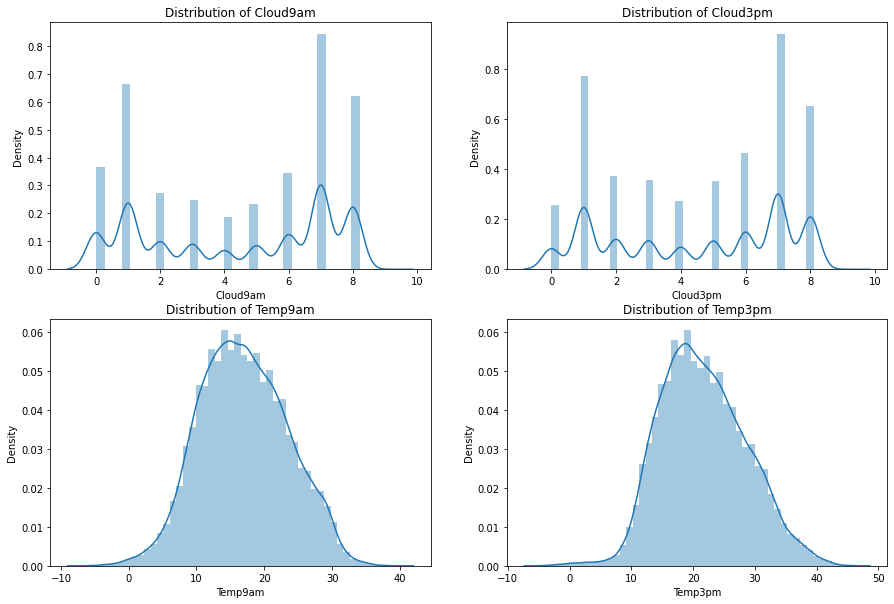

In [36]:
plt.rcParams["figure.figsize"]=(15,10)
 
plt.subplot(2,2,1)
plt.title("Distribution of Cloud9am")
sns.distplot(data["Cloud9am"])
plt.subplot(2,2,2)
plt.title("Distribution of Cloud3pm")
sns.distplot(data["Cloud3pm"])
plt.subplot(2,2,3)
plt.title("Distribution of Temp9am")
sns.distplot(data["Temp9am"])
plt.subplot(2,2,4)
plt.title("Distribution of Temp3pm")
sns.distplot(data["Temp3pm"])
plt.show()

In [37]:
data["Temp3pm"]=data["Temp3pm"].fillna(data["Temp3pm"].median())
data["Temp9am"]=data["Temp9am"].fillna(data["Temp9am"].median())

In [38]:
data["Cloud9am"]=data["Cloud9am"].fillna(np.random.choice([7.,  1.,  0.,  5.,  4.,  2.,  6.,  3.,  9., 8.]))
data["Cloud3pm"]=data["Cloud3pm"].fillna(np.random.choice([2.,  8.,  7.,  1.,  5.,  4.,  6.,  3.,  0.,  9.]))

In [40]:
data["RainToday"].isnull().sum()

3261

In [41]:
data.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      62790
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

In [42]:
data.drop(columns=["Evaporation"],inplace=True)

In [43]:
data.isnull().sum().sum()

16854

In [44]:
data.dropna(inplace=True)

In [45]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [46]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,8.4,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,4.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,8.4,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,4.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,8.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,8.4,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,4.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,8.4,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [47]:
data.to_csv("/content/drive/MyDrive/datasets/newdata1/Cleaned_WeatherAUS.csv")